In [1]:
using Distributions
using StatsPlots
using StatsBase
using CSV
using DataFrames
using LinearAlgebra
using Random
using Turing
using Plots
using ColorSchemes

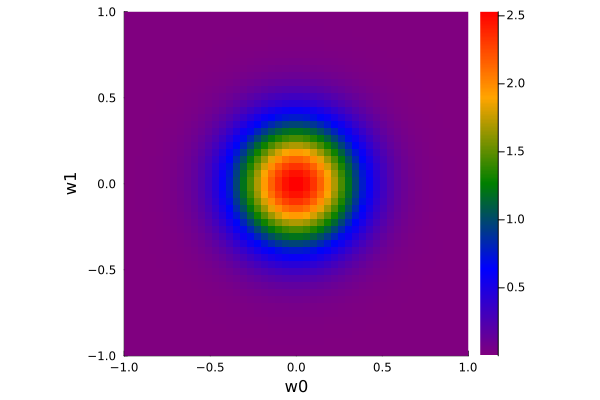

In [2]:
size = 50
Random.seed!(2971) # Setting the seed
a0 = -0.3
a1 = 0.5
w0 = range(-1, 1; length=size)
w1 = range(-1, 1; length=size)

prior_w0 = zeros(size,size)
prior_w1 = zeros(size,size)
prior = zeros(size,size)
likelihood = zeros(size,size)
posterior_unstandardized = zeros(size,size)

for i in 1:size
    for j in 1:size
        prior_w0[i,j] = pdf(Normal(0,0.25),w0[i])
        prior_w1[i,j] = pdf(Normal(0,0.25),w1[j])
        prior[i,j] = prior_w0[i,j]*prior_w1[i,j]   
    end
end
xlim = extrema(w0)
ylim = extrema(w1)

heatmap(w0, w1, prior, xlabel="w0", ylabel="w1", xlimits=xlim, ylimits = ylim, fill = (true,cgrad(:rainbow)), aspect_ratio = :equal)
#savefig("row1.png") # save the most recent fig as filename_string (such as "output.png")

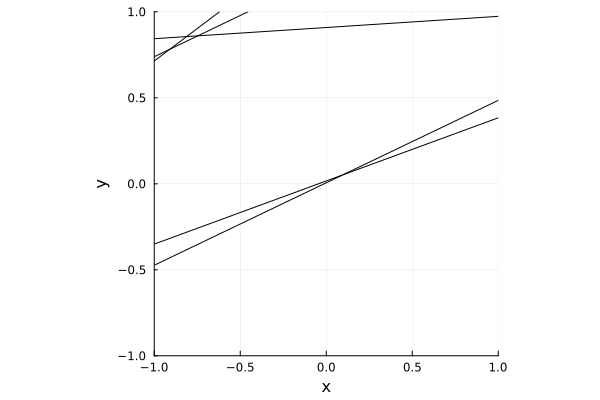

In [3]:
w0_rand = rand(1:size,6)
w1_rand = rand(1:size,6)
p = scatter(0, 0; label=false)
for (w0_, w1_) ∈ zip(w0_rand, w1_rand)
    plot!(x -> prior_w0[w0_, w1_] + prior_w1[w0_,w1_] * (x); xlabel="x", ylabel="y", xlimits=xlim, ylimits = ylim, c="black", alpha=10, legend=false, aspect_ratio = :equal)
end
display(p)


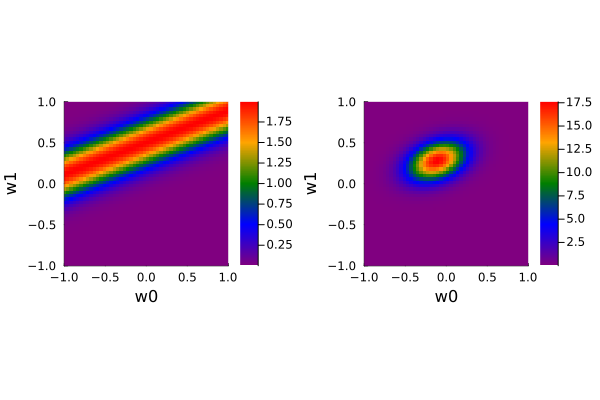

In [4]:
# second row
Random.seed!(2971) # Setting the seed
n = 1
xn = only(rand(Uniform(-1,1),n))+only(rand(Normal(0,0.2),n))

for i in 1:size
    for j in 1:size

        w0_temp = w0[i]
        w1_temp = w1[j]
        
        base_y_value = w0_temp + w1_temp*xn - (a0 + a1*xn)
        likelihood[i,j] = pdf(Normal(base_y_value, 0.2),1)
        posterior_unstandardized[i,j] = likelihood[i,j] * prior[i,j]
    end
end

posterior_std = posterior_unstandardized / (sum(posterior_unstandardized)*1/(size*size))

xlim = extrema(w0)
ylim = extrema(w1)
plot(heatmap(w0, w1, likelihood, xlabel="w0", ylabel="w1",xlimits=xlim, ylimits = ylim, fill = (true,cgrad(:rainbow)), aspect_ratio = :equal),
    heatmap(w0, w1, posterior_std, xlabel="w0", ylabel="w1",xlimits=xlim, ylimits = ylim, fill = (true,cgrad(:rainbow)), aspect_ratio = :equal),
    layout=(1,2))
#savefig("row2.png")

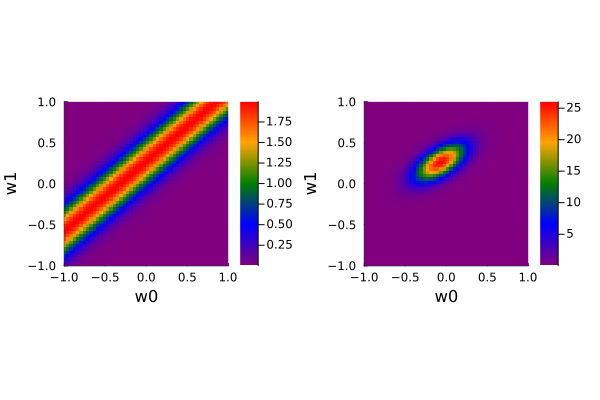

In [5]:
# third row

xn = only(rand(Uniform(-1,1),1))+only(rand(Normal(0,0.2),1))

prior = posterior_std

for i in 1:size
    for j in 1:size
        w0_temp = w0[i]
        w1_temp = w1[j]
        
        base_y_value = w0_temp + w1_temp*xn - (a0 + a1*xn)
        likelihood[i,j] = pdf(Normal(base_y_value, 0.2), 1)
        posterior_unstandardized[i,j] = likelihood[i,j] * prior[i,j]
    end
end

posterior_std = posterior_unstandardized / (sum(posterior_unstandardized)*1/(size*size))

xlim = extrema(w0)
ylim = extrema(w1)
plot(heatmap(w0, w1, likelihood, xlabel="w0", ylabel="w1",xlimits=xlim, ylimits = ylim, fill = (true,cgrad(:rainbow)), aspect_ratio = :equal),
    heatmap(w0, w1, posterior_std, xlabel="w0", ylabel="w1",xlimits=xlim, ylimits = ylim, fill = (true,cgrad(:rainbow)), aspect_ratio = :equal),
    layout=(1,2))
#savefig("row3.png")

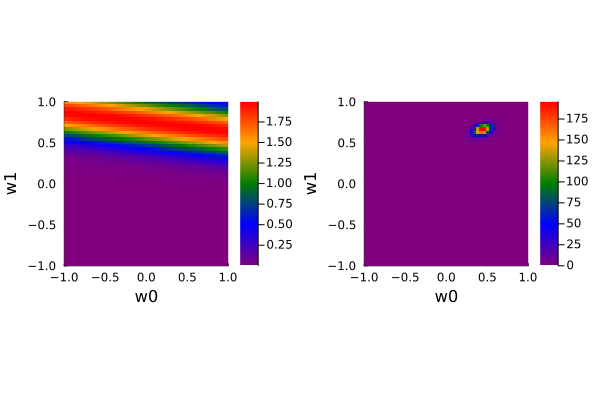

In [6]:
# fourth row

for point_number = 1:18
    xn = only(rand(Uniform(-1,1),1))+only(rand(Normal(0,0.2),1)) 

    prior = posterior_std

    for i in 1:size
        for j in 1:size
            w0_temp = w0[i]
            w1_temp = w1[j]
            
            base_y_value = w0_temp + w1_temp*xn - (a0 + a1*xn)
            likelihood[i,j] = pdf(Normal(base_y_value, 0.2), 1)
            posterior_unstandardized[i,j] = likelihood[i,j] * prior[i,j]
        end
    end

    posterior_std = posterior_unstandardized/(sum(posterior_unstandardized)*1/(size*size))
end

xlim = extrema(w0)
ylim = extrema(w1)
plot(heatmap(w0, w1, likelihood, xlabel="w0", ylabel="w1", xlimits=xlim, ylimits = ylim, fill = (true,cgrad(:rainbow)), aspect_ratio = :equal),
    heatmap(w0, w1, posterior_std, xlabel="w0", ylabel="w1", xlimits=xlim, ylimits = ylim, fill = (true,cgrad(:rainbow)), aspect_ratio = :equal),
    layout=(1,2))
#savefig("row4.png")